In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv(r'DCT_withoutduplicate 5.csv')

#droping the LEVEL from dataset and assining to X variable and assining the level to y variable
X = df.drop('LABEL', axis=1)
y = df['LABEL']

df

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,LABEL
0,38687.88477,192.737565,188.366005,2348.285240,188.609889,3359.777672,-454.999177,-201.722600,-42.369585,-277.176688,...,225.163042,375.848590,-25.502103,-323.360801,-37.705123,-210.361583,-107.039989,-180.598400,-151.319809,3333
1,29532.98806,-54.124623,-22.492524,1648.326090,35.160362,1980.716201,144.818556,38.937042,56.479929,79.150981,...,-110.815428,-112.520155,80.464341,62.949615,-41.839087,35.049056,-90.838441,81.998960,-92.591774,3333
2,29511.41174,-54.495937,-25.026162,1658.645198,34.814464,2008.855279,145.774409,42.363949,56.631487,84.338212,...,-111.628888,-113.504989,80.598537,64.218283,-42.996801,35.926709,-94.681206,82.389334,-98.420772,3333
3,29060.40637,-19.466804,-11.668273,1487.612245,7.675333,1788.287900,49.023922,24.901637,47.767988,42.011626,...,-5.242054,-79.615224,165.018166,177.905061,-50.329188,88.189776,-56.963265,-63.527378,14.576799,3333
4,29039.93589,-19.725400,-9.218980,1497.054471,8.947552,1815.189691,49.680814,22.071049,48.720409,37.361647,...,-5.661566,-82.903805,166.929649,179.234546,-53.045528,88.144964,-60.471382,-63.239210,13.008128,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,34590.67425,-90.481178,421.895545,2269.474748,107.710202,2668.551550,142.712956,-342.353042,33.714659,-940.227697,...,391.219466,-98.648267,86.227296,-375.903540,287.882640,-316.402536,572.251239,-148.584321,195.160357,3454
2246,34463.79965,-75.135670,422.035399,2045.071565,-139.594897,2546.697810,112.253709,-347.652005,11.001316,-934.795429,...,380.185391,-69.445833,76.263640,-383.165396,302.384031,-329.576874,564.414974,-181.641673,178.081840,3454
2247,33276.41490,346.619982,43.823796,1314.651432,10.557620,1234.860466,-827.112407,-45.102951,-366.540637,-128.503617,...,-447.309822,-62.797378,-297.150634,222.234489,35.249477,127.867278,-46.105235,-98.898611,-90.071387,3454
2248,33278.26695,344.970914,44.197445,1312.348411,17.356769,1231.482676,-823.766550,-53.524959,-364.266173,-129.244004,...,-426.781184,-73.880082,-268.764091,188.648206,52.127368,117.002736,-25.738164,-106.915699,-103.507262,3454


**A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes.**

In [2]:
# calculating the mean and reducing the data redudency by grouping the LABEL
class_means = df.groupby('LABEL').mean()

# calculating the spread (standard deviation) 
class_spreads = df.groupby('LABEL').std()

# Taking mean of two column i.e index 0 and 1 as data set to calculate inter-diatance.
class1_mean = class_means.iloc[0]
class2_mean = class_means.iloc[1]
interclass_distance = np.linalg.norm(class1_mean - class2_mean)

print("Class 1 Mean:\n", class1_mean)
print("Class 2 Mean:\n", class2_mean)
print("Interclass Distance:", interclass_distance)


Class 1 Mean:
 0      35021.971518
1         30.944450
2         39.454434
3       2397.193236
4         67.341696
           ...     
191       42.055855
192        9.733818
193       91.755459
194      -53.070227
195       43.406243
Name: 3333, Length: 196, dtype: float64
Class 2 Mean:
 0      38078.659501
1       -229.109162
2         64.151173
3       2651.788417
4        -39.908549
           ...     
191       29.749377
192     -302.089126
193      -36.515134
194     -108.459160
195     -138.399487
Name: 3334, Length: 196, dtype: float64
Interclass Distance: 4194.473313341158


**A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.**

0       38687.88477
1       29532.98806
2       29511.41174
3       29060.40637
4       29039.93589
           ...     
2245    34590.67425
2246    34463.79965
2247    33276.41490
2248    33278.26695
2249    33006.65196
Name: 0, Length: 2250, dtype: float64


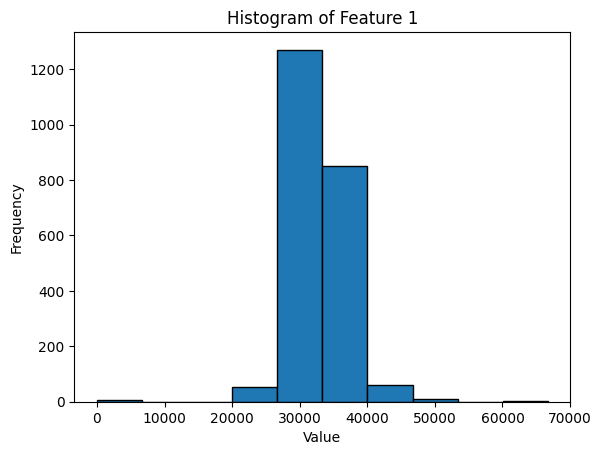

Mean of Feature 1: 32263.61287062666
Variance of Feature 1: 19621535.75684276


In [3]:
import matplotlib.pyplot as plt

# Taking colunme index 0 as feature from my data-set
feature = df['0']
print(feature)

# Plot the histogram
plt.hist(feature, bins=10, edgecolor='black')
plt.title('Histogram of Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance
mean_feature = np.mean(feature)
variance_feature = np.var(feature)

print("Mean of Feature 1:", mean_feature)
print("Variance of Feature 1:", variance_feature)


**A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph.**

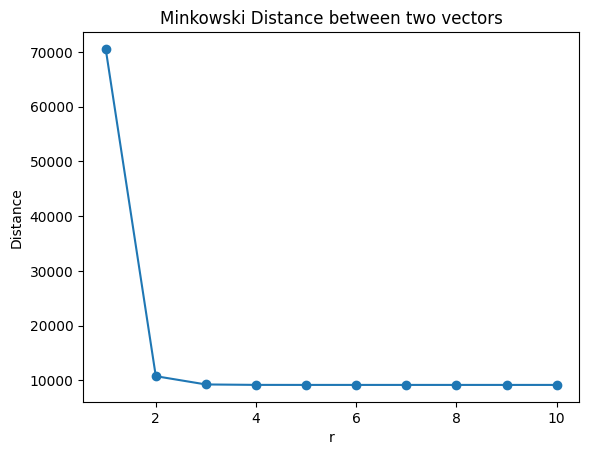

In [4]:
#importing 'minkowski' Minkwoski distance 
from scipy.spatial.distance import minkowski

# Select two feature vectors
vector1 = X.iloc[0]
vector2 = X.iloc[1]

# Calculate Minkowski distance r from 1 to 10
distances = []

for r in range(1, 11):
    distance = minkowski(vector1, vector2, r)
    distances.append(distance)

# Plot the distance vs r
plt.plot(range(1, 11), distances, marker='o')
plt.title('Minkowski Distance between two vectors')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()


**A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train-
test_split() function available in SciKit. See below sample code for help:**

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1575, 196)
Test set size: (675, 196)


**A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code
for help:**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Training a KNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.**

In [7]:
# trrsting  the accuracy of the KNN classifier
accuracy = knn.score(X_test, y_test)
print("KNN Classifier Accuracy:", accuracy)


KNN Classifier Accuracy: 0.8059259259259259


**A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.**

In [8]:
# Predict the class of the test set
predictions = knn.predict(X_test)
print("Predictions:\n", predictions)


Predictions:
 [3366 3353 3356 3346 3333 3334 3384 3354 3381 3376 3349 3376 3377 3450
 3373 3354 3360 3452 3368 3377 3349 3359 3374 3356 3450 3384 3360 3349
 3385 3335 3364 3346 3364 3366 3372 3360 3453 3381 3364 3379 3335 3385
 3376 3335 3451 3453 3376 3353 3353 3383 3376 3335 3371 3452 3384 3378
 3385 3360 3349 3452 3385 3334 3377 3364 3451 3381 3381 3360 3359 3346
 3376 3381 3381 3359 3373 3366 3377 3382 3342 3363 3371 3382 3383 3333
 3374 3379 3334 3376 3349 3367 3452 3353 3376 3381 3378 3342 3351 3451
 3342 3376 3454 3342 3374 3363 3363 3342 3367 3356 3361 3371 3450 3335
 3452 3375 3385 3352 3349 3368 3383 3453 3385 3370 3374 3384 3363 3379
 3376 3376 3365 3346 3378 3359 3361 3385 3373 3334 3377 3375 3371 3368
 3452 3379 3381 3349 3385 3383 3362 3382 3364 3384 3351 3334 3335 3354
 3381 3376 3354 3363 3450 3356 3379 3376 3353 3354 3453 3351 3342 3360
 3353 3381 3385 3376 3376 3377 3362 3352 3333 3342 3372 3351 3381 3373
 3334 3352 3375 3374 3373 3454 3451 3337 3368 3362 3368 3377 34

**A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.**

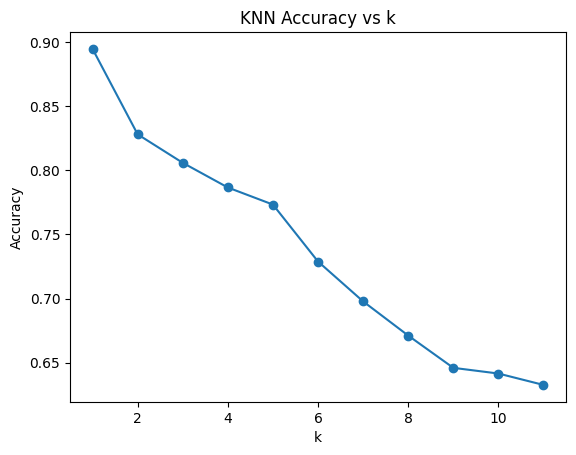

In [9]:
# Vary k from 1 to 11 and observe accuracy
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot the accuracy vs k
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('KNN Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


**A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).**

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Calculate precision, recall, and F1-Score
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print()
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
 [[11  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  1]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  1  0 12]]

Precision: 0.7358063794859557
Recall: 0.7494641685142969
F1-Score: 0.7332717095967962


/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
